In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler


In [2]:
# Load the dataset
df = pd.read_csv('bike_data.csv')

In [3]:
# Parse timestamp to create time-related features
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['Hour'] = df['timestamp'].dt.hour
df['Month'] = df['timestamp'].dt.month
df['Day'] = df['timestamp'].dt.day
df['DayOfWeek'] = df['timestamp'].dt.dayofweek

In [4]:
# Select relevant features and target
X = df[['station_id', 'Hour', 'Month', 'Day', 'DayOfWeek', 'weather_sunny', 'weather_rainy', 'holidays_public_holiday']]
y = df['maintenance_needed']

In [13]:
# Split the data into training and validation sets
X_train_class, X_val_class, y_train_class, y_val_class = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# Scale the features for the neural network
scaler = StandardScaler()
X_train_class_scaled = scaler.fit_transform(X_train_class)
X_val_class_scaled = scaler.transform(X_val_class)

In [15]:
# Convert the target variable to categorical (one-hot encoding)
y_train_class_categorical = to_categorical(y_train_class)
y_val_class_categorical = to_categorical(y_val_class)

In [10]:
# Build the neural network model
nn_model = Sequential([
    Dense(64, input_dim=X_train_class_scaled.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')  # 2 output neurons for binary classification
])


In [11]:
# Compile the model
nn_model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

In [16]:
# Train the model
history = nn_model.fit(X_train_class_scaled, y_train_class_categorical,
                       epochs=100,  # You can adjust the number of epochs
                       batch_size=32,
                       validation_data=(X_val_class_scaled, y_val_class_categorical),
                       verbose=1)

Epoch 1/100


250/250 [==============================] - 2s 3ms/step - loss: 0.3440 - accuracy: 0.8938 - val_loss: 0.3315 - val_accuracy: 0.9015
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3235 - accuracy: 0.9024 - val_loss: 0.3279 - val_accuracy: 0.9015
Epoch 3/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3205 - accuracy: 0.9024 - val_loss: 0.3265 - val_accuracy: 0.9015
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3196 - accuracy: 0.9024 - val_loss: 0.3295 - val_accuracy: 0.9015
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3180 - accuracy: 0.9024 - val_loss: 0.3325 - val_accuracy: 0.9015
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3170 - accuracy: 0.9024 - val_loss: 0.3294 - val_accuracy: 0.9015
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3165 - accuracy: 0.9024 - val_loss: 0.3315 - val_accuracy: 0.90

In [19]:
# Evaluate the neural network model
from sklearn.metrics import f1_score, precision_score, recall_score


train_loss, train_accuracy = nn_model.evaluate(X_train_class_scaled, y_train_class_categorical, verbose=0)
val_loss, val_accuracy = nn_model.evaluate(X_val_class_scaled, y_val_class_categorical, verbose=0)

# Predicting the classes
y_train_preds_nn = nn_model.predict(X_train_class_scaled).argmax(axis=1)
y_val_preds_nn = nn_model.predict(X_val_class_scaled).argmax(axis=1)

# Calculate and print the metrics for the neural network model
train_precision_nn = precision_score(y_train_class, y_train_preds_nn)
val_precision_nn = precision_score(y_val_class, y_val_preds_nn)

train_recall_nn = recall_score(y_train_class, y_train_preds_nn)
val_recall_nn = recall_score(y_val_class, y_val_preds_nn)

train_f1_nn = f1_score(y_train_class, y_train_preds_nn)
val_f1_nn = f1_score(y_val_class, y_val_preds_nn)

63/63 [==============================] - 0s 1ms/step


In [21]:
from sklearn.metrics import classification_report


print("Neural Network Training Metrics:")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"Precision: {train_precision_nn:.4f}")
print(f"Recall: {train_recall_nn:.4f}")
print(f"F1 Score: {train_f1_nn:.4f}")

print("\nNeural Network Validation Metrics:")
print(f"Accuracy: {val_accuracy:.4f}")
print(f"Precision: {val_precision_nn:.4f}")
print(f"Recall: {val_recall_nn:.4f}")
print(f"F1 Score: {val_f1_nn:.4f}")

# Print the classification report for the neural network model on validation set
print("\nNeural Network Classification Report (Validation):\n", classification_report(y_val_class, y_val_preds_nn))


Neural Network Training Metrics:
Accuracy: 0.9087
Precision: 0.6624
Recall: 0.1332
F1 Score: 0.2217

Neural Network Validation Metrics:
Accuracy: 0.8890
Precision: 0.0968
Recall: 0.0152
F1 Score: 0.0263

Neural Network Classification Report (Validation):
               precision    recall  f1-score   support

           0       0.90      0.98      0.94      1803
           1       0.10      0.02      0.03       197

    accuracy                           0.89      2000
   macro avg       0.50      0.50      0.48      2000
weighted avg       0.82      0.89      0.85      2000



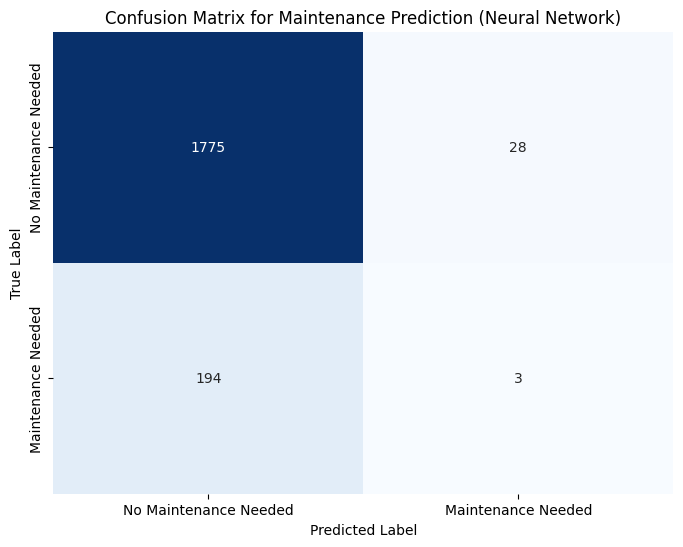

In [24]:
# Plotting the confusion matrix for the neural network model
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns



conf_matrix_nn = confusion_matrix(y_val_class, y_val_preds_nn)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nn, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Maintenance Needed', 'Maintenance Needed'],
            yticklabels=['No Maintenance Needed', 'Maintenance Needed'])
plt.title('Confusion Matrix for Maintenance Prediction (Neural Network)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [25]:
# Save the model and the scaler
import joblib


nn_model.save('maintenance_prediction_model.h5')
joblib.dump(scaler, './maintenance_prediction/scaler.pkl')

c:\Users\91932\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


['./maintenance_prediction/scaler.pkl']